In [1]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def assess_vm(vm_nb: int) -> requests.Response:
    url = 'http://localhost:8080/virtual_machines/assess'
    headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}
    vms = []
    vm_ram = 4.0
    vm_storage = 20.0
    vm_vcpu = 1.0
    for i in range(vm_nb):
        vms.append({
            "id": i,
            "pool_id": "worker",
            "quantity": {
                "amount": 1.0,
                "unit": "u"
            },
            "ram": {
                "amount": vm_ram,
                "unit": "GB"
            },
            "storage": {
                "amount": vm_storage,
                "unit": "GB"
            },
            "vcpu": {
                "amount": vm_vcpu,
                "unit": "vCPU"
            }
       })
        
    data = {
        "period": {
            "amount": 1.0,
            "unit": "hour"
        },
        "total_vcpu": {
            "amount": vm_nb * vm_vcpu,
            "unit": "vCPU"
        },
        "total_ram": {
            "amount": vm_nb * vm_ram,
            "unit": "GB"
        },
        "total_storage": {
            "amount": vm_nb * vm_storage,
            "unit": "TB"
        },
        "virtual_machines": vms
    }
    return requests.post(url, headers = headers, data = json.dumps(data))

def assess_vm_elapsed_time(vm_nb: int, assess_nb: int) -> list[float]: 
    return [assess_vm(vm_nb).elapsed.total_seconds() for _ in range(assess_nb)]

In [86]:
assess_vm(2).elapsed.total_seconds()

2.250066

In [66]:
assess_vm_elapsed_time(2,2)

[2.651261, 2.58381]

In [87]:
vm_nbs = [1, 2, 5, 10, 20, 50, 100]
results  = [assess_vm_elapsed_time(x, 1) for x in vm_nbs]

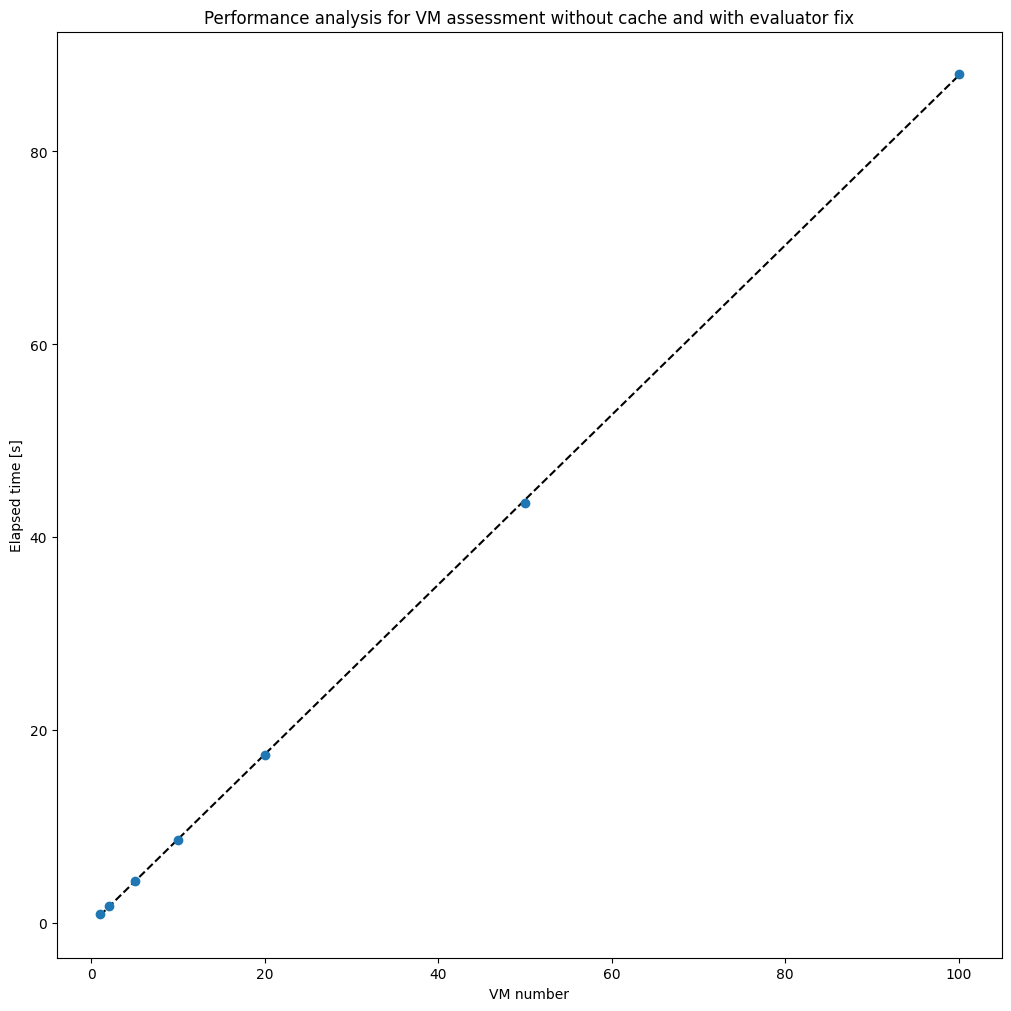

In [88]:
means = [np.mean(x) for x in results]
errors = [np.std(x, ddof=1) / np.sqrt(len(x)) for x in results]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

# linear regression
coef = np.polyfit(vm_nbs,means,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(vm_nbs, poly1d_fn(vm_nbs), '--k')

# mean results with error bars
ax.errorbar(vm_nbs, means, errors, fmt='o', linewidth=2, capsize=6)
ax.set_title('Performance analysis for VM assessment without cache and with evaluator fix')
ax.set_ylabel('Elapsed time [s]')
ax.set_xlabel('VM number')

plt.show()

In [89]:
filename = '001_perf_analysis_vm_assess_without_cache_and_with_eval_fix_02'

In [90]:
fig.savefig(filename+'.png') 

In [91]:
# save results
import pickle
with open(filename, "wb") as fp:   #Pickling
    pickle.dump(results, fp)

In [109]:
# load all results

with open("001_perf_analysis_vm_assess_without_cache_and_with_eval_fix_02", "rb") as fp:   # Unpickling
    wo_cache = pickle.load(fp)

with open("001_perf_analysis_vm_assess_without_cache_and_extended_oracle_cache_and_with_eval_fix_02", "rb") as fp:   # Unpickling
    wo_cache_and_extended_oracle_cache = pickle.load(fp)

with open("001_perf_analysis_vm_assess_with_cache_and_with_eval_fix_02", "rb") as fp:   # Unpickling
    w_cache = pickle.load(fp)    

with open("001_perf_analysis_vm_assess_with_cache_and_extended_oracle_cache_and_with_eval_fix_02", "rb") as fp:   # Unpickling
    w_cache_and_extended_oracle_cache = pickle.load(fp)

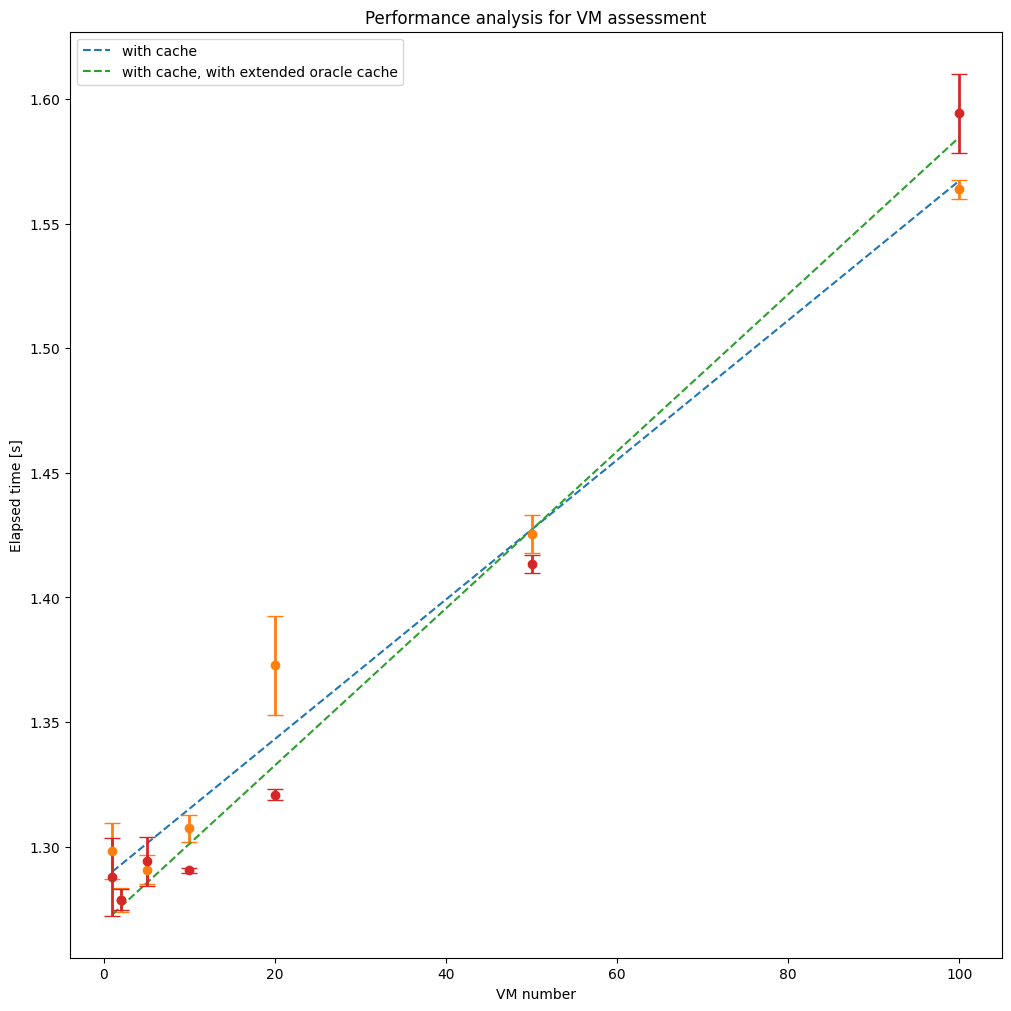

In [112]:
def plot_results(results, ax, label):
    means = [np.mean(x) for x in results]
    errors = [np.std(x, ddof=1) / np.sqrt(len(x)) for x in results]

    # linear regression
    coef = np.polyfit(vm_nbs,means,1)
    poly1d_fn = np.poly1d(coef) 
    ax.plot(vm_nbs, poly1d_fn(vm_nbs), '--', label=label)
    ax.errorbar(vm_nbs, means, errors, fmt='o', linewidth=2, capsize=6)
    
# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')
#plot_results(wo_cache, ax, 'without cache')
plot_results(w_cache, ax, 'with cache')
#plot_results(wo_cache_and_extended_oracle_cache, ax, 'without cache, with extended oracle cache')
plot_results(w_cache_and_extended_oracle_cache, ax, 'with cache, with extended oracle cache')
ax.legend()


# mean results with error bars
ax.set_title('Performance analysis for VM assessment')
ax.set_ylabel('Elapsed time [s]')
ax.set_xlabel('VM number')

plt.show()

In [113]:
fig.savefig('001_perf_analysis_vm_assess_w_cache_and_extended_01.png') 